In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AAPL.csv')
data.head(10)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [3]:
data.shape

(1258, 15)

In [4]:
data.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data = data.drop(['symbol','Unnamed: 0','splitFactor', 'divCash'],axis=1)

In [7]:
data.isnull().sum()

date         0
close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
dtype: int64

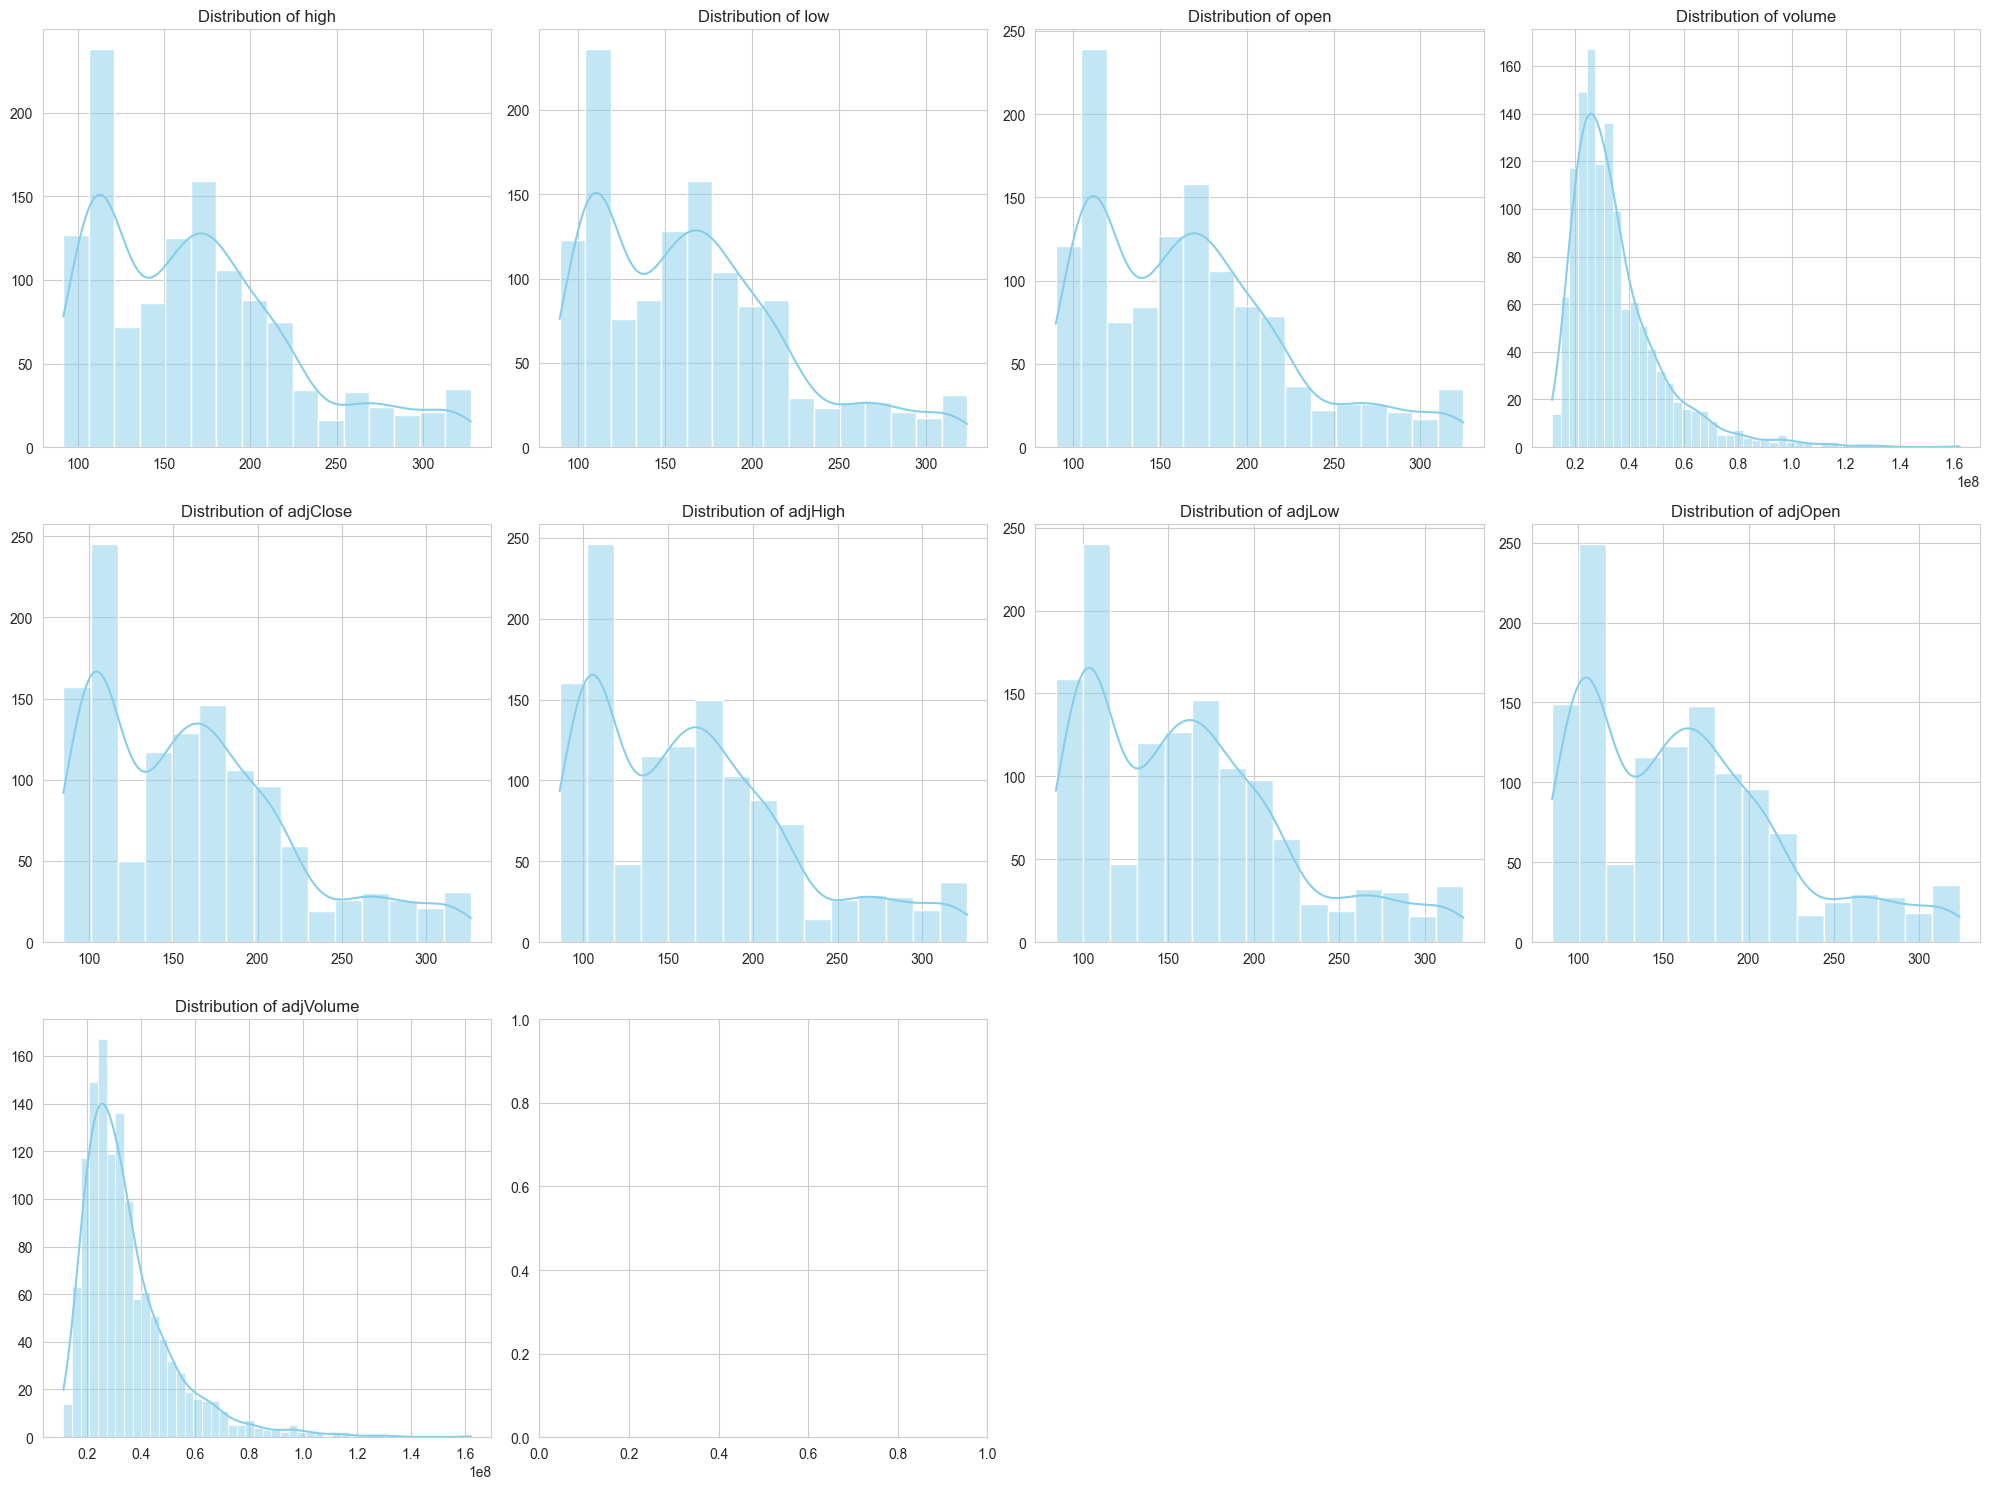

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Postavljanje stila za grafike
sns.set_style("whitegrid")
#column_dt_customer = data['Dt_Customer']

# Broj kolona i redova u subplotu
num_cols = 4  # Broj kolona
num_rows = (len(data.columns) - 2) // num_cols + 1  # Broj redova

# Kreiranje subplota
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iteriranje kroz sve kolone osim 'Dt_Customer'
for i, column in enumerate(data.columns[2:]):
    #if column != 'Dt_Customer':
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data[column], kde=True, ax=axes[row, col], color='skyblue')
        axes[row, col].set_title(f'Distribution of {column}', fontsize=12)
        axes[row, col].set_xlabel('')
        axes[row, col].set_ylabel('')

# Uklanjanje praznih subplotova
for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Podešavanje rasporeda
plt.tight_layout()
plt.show()



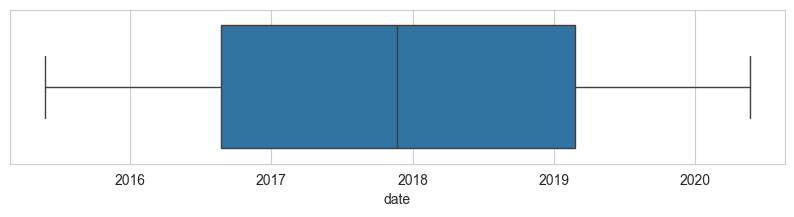

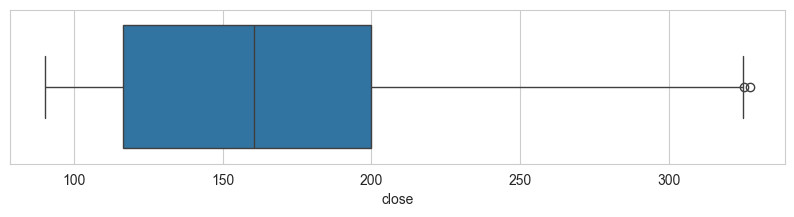

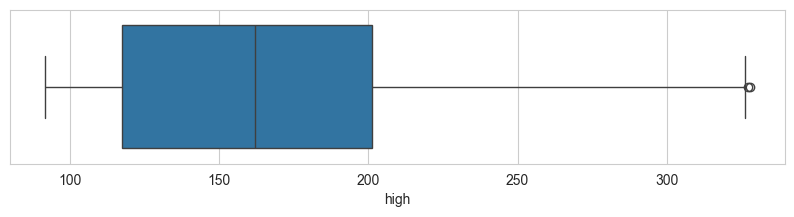

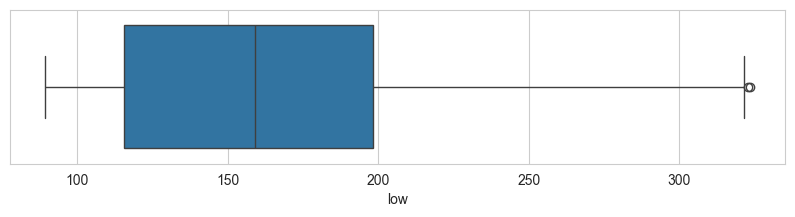

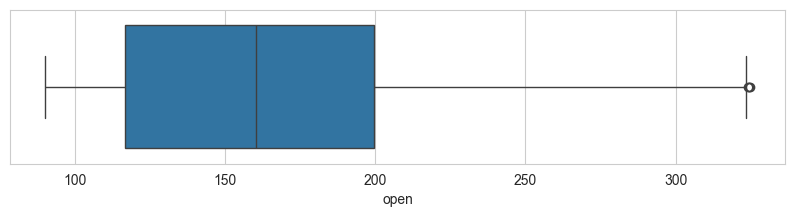

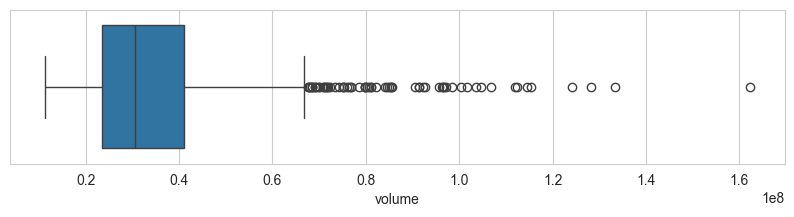

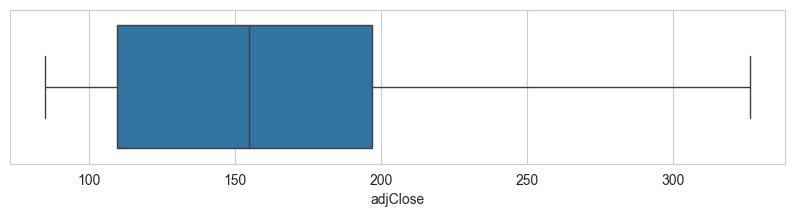

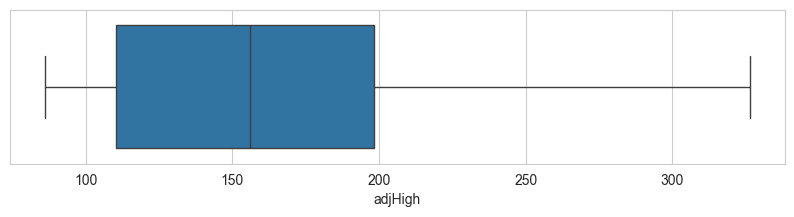

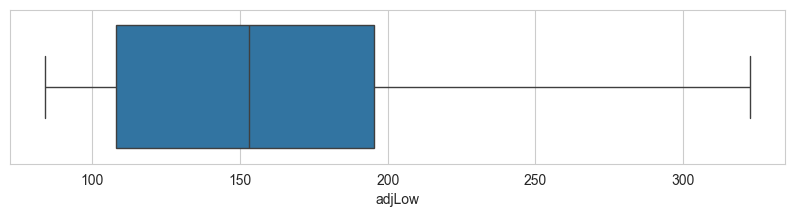

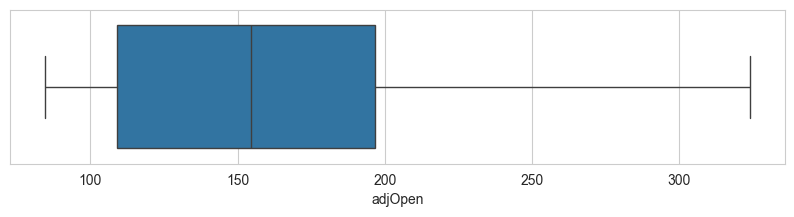

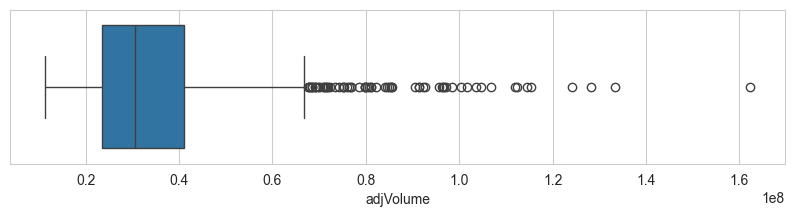

In [9]:
for i in data.columns:
    plt.figure(figsize = (10,2))
    sns.boxplot(x = data[i])
    plt.show()

In [10]:
df_not_date = data.drop(["date"], axis=1)
df_not_date.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246
1,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309
2,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452
3,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797
4,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(df_not_date).reshape(-1,1))

In [20]:
data_scaled.shape

(12580, 1)

In [21]:
hops = 14
no_records = 12580
no_cols = 11
X_train=[]
y_train=[]
for i in range(hops,no_records):
    X_train.append(data_scaled[i-hops:i])
    y_train.append(data_scaled[i][0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [22]:
print(X_train.shape)
print(y_train.shape)

(12566, 14, 1)
(12566,)


In [23]:
X_train_shape = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train_shape.shape

(12566, 14, 1)

In [25]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(hops,no_cols)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train_shape, y_train, epochs=100, batch_size=64)
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

AttributeError: module 'keras.src.backend' has no attribute 'Variable'